In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
admission_df=pd.read_csv('admission.csv')

In [ ]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# New Section

In [ ]:
admission_df.drop('Serial No.', axis = 1 , inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df_university= admission_df.groupby(by= 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1e29da048>,
      dtype=object)

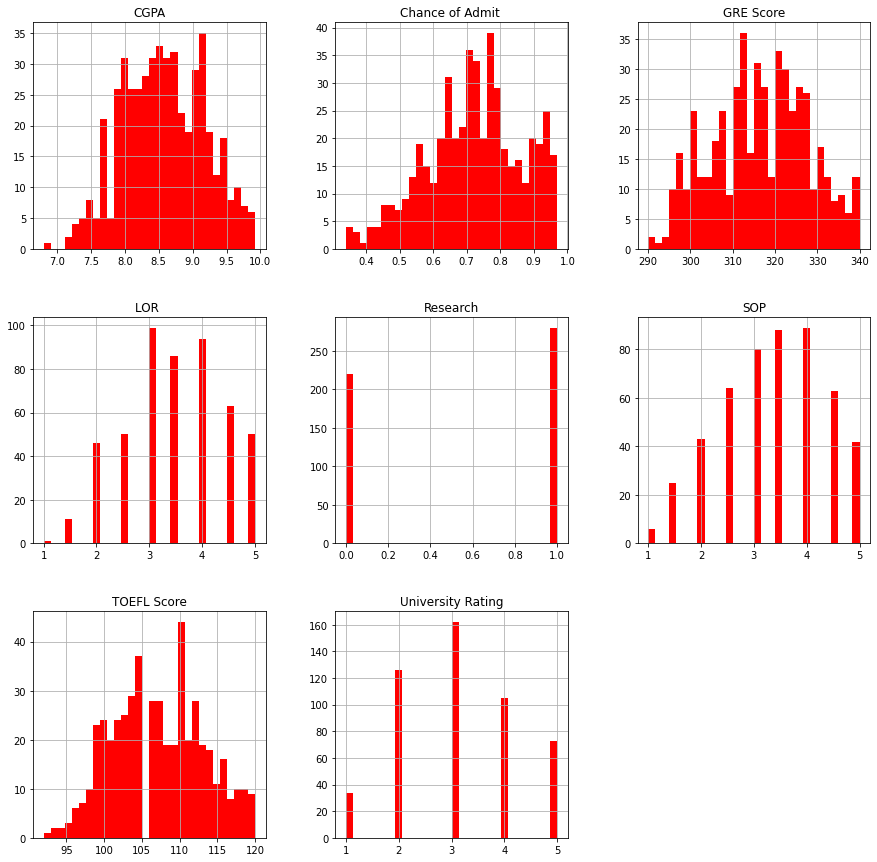

In [ ]:
admission_df.hist(bins=30, figsize = (15,15) , color = 'r')

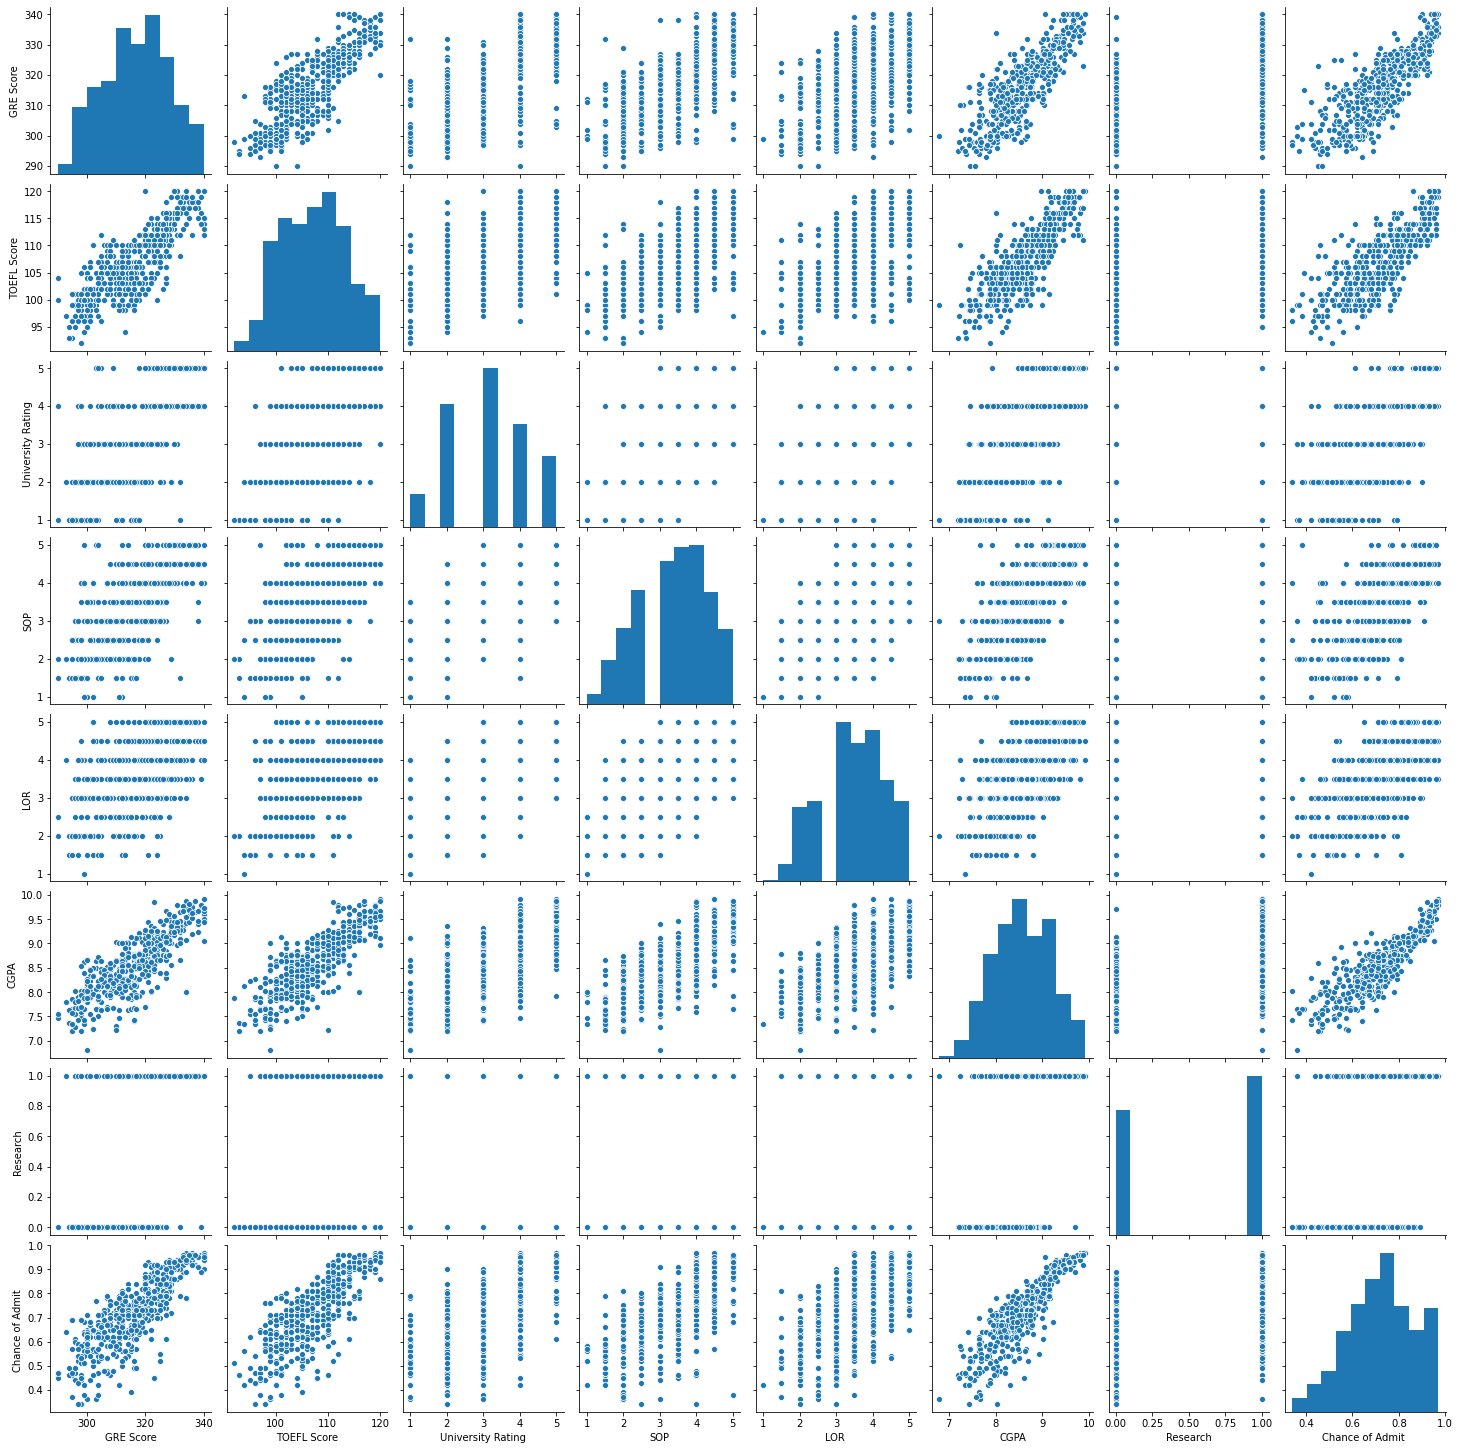

In [ ]:
sns.pairplot(admission_df)

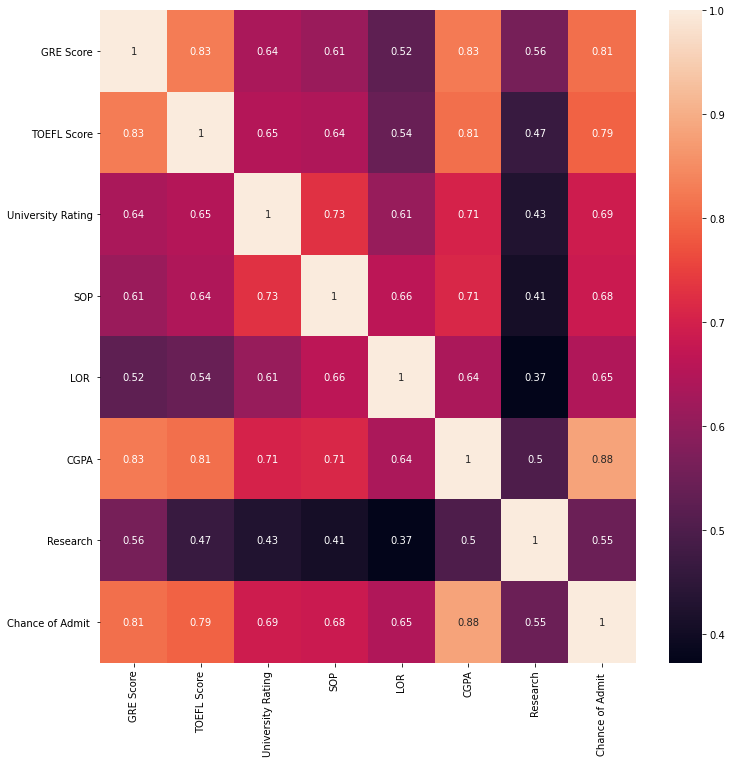

In [ ]:
corr_matrix=admission_df.corr()
plt.figure(figsize= (12,12))
sns.heatmap(corr_matrix , annot = True)
plt.show()

In [ ]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
x = admission_df.drop(columns = ['Chance of Admit '])

In [ ]:
y = admission_df['Chance of Admit ']

In [ ]:
x.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
y=y.reshape(-1,1)
y.shape

(500, 1)

In [ ]:
#scaling the data before training- to avoid overfit as value ranges are diffreent
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x=StandardScaler()
x= scaler_x.fit_transform(x)

In [ ]:
scaler_y=StandardScaler()
y= scaler_y.fit_transform(y)

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size=0.15)

In [ ]:
#train and evaluate simple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score


In [ ]:
accuracy_LinearRegression = linear_regression_model.score(x_test,y_test)
accuracy_LinearRegression

0.8329353204188292

In [ ]:
#train and evalute ann
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5)) #regularization technique
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [ ]:
ANN_model.compile(optimizer='Adam' , loss= 'mean_squared_error')

In [ ]:
epochs_hist=ANN_model.fit(x_train,y_train,epochs =100 , batch_size=20 , validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 0s 13ms/step - loss: 0.5787 - val_loss: 0.2201
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3138 - val_loss: 0.2435
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3299 - val_loss: 0.1945
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2628 - val_loss: 0.2060
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3355 - val_loss: 0.2018
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2712 - val_loss: 0.1860
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2569 - val_loss: 0.2131
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2448 - val_loss: 0.1991
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2275 - val_loss: 0.1821
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2557 - val_loss: 0.2078
Epoch 11

In [ ]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))


3/3 [==============================] - 0s 2ms/step - loss: 0.1997
Accuracy : 0.8003484308719635


In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

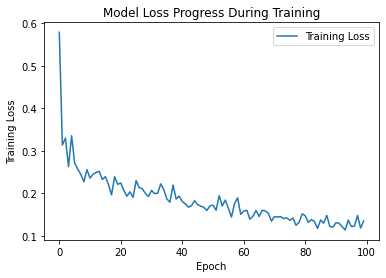

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
#train and evaluate decision tree and random forest model
from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(x_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
accuracy_decisionTree = decisionTree_model.score(x_test, y_test)
accuracy_decisionTree

0.6727391311046327

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForest_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
accuracy_randomforest = randomForest_model.score(x_test, y_test)
accuracy_randomforest

0.796519611294285

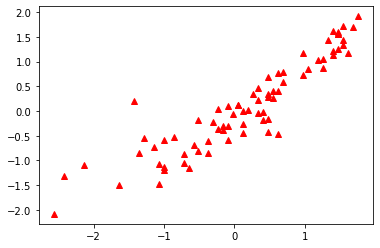

In [ ]:
#regression kpi
y_pred = linear_regression_model.predict(x_test)
plt.plot(y_test, y_pred, '^', color='r')

In [ ]:
y_predict_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

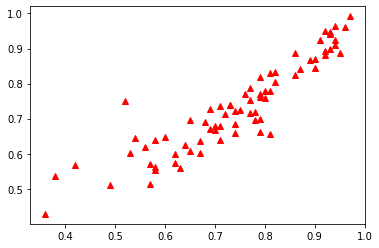

In [ ]:
plt.plot(y_test_orig, y_predict_orig, '^', color='r')

In [ ]:
k = x_test.shape[1]
n = len(x_test)
n

75

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.059 
MSE = 0.003469997250734001 
MAE = 0.043294133441312575 
R2 = 0.8329353204188292 
Adjusted R2 = 0.8154808016566173


In [ ]:
#deploy on webapp
import pickle

In [ ]:
s = np.array([320, 110, 1, 5, 5, 9, 1])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)

(7,)
(1, 7)


In [ ]:
pickle.dump(linear_regression_model, open('linear_regression_model_sc.pkl', 'wb'))

In [ ]:
model = pickle.load(open('linear_regression_model_sc.pkl', 'rb'))
print(model.predict(s))

[[72.14985201]]
